In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [35]:
start = '2022-01-01'
end = '2022-12-01'
stock = 'MSFT'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [36]:
data.reset_index(inplace=True)

In [37]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,335.350006,338.000000,329.779999,334.750000,328.120880,28865100
1,2022-01-04,334.829987,335.200012,326.119995,329.010010,322.494537,32674300
2,2022-01-05,325.859985,326.070007,315.980011,316.380005,310.114685,40054300
3,2022-01-06,313.149994,318.700012,311.489990,313.880005,307.664154,39646100
4,2022-01-07,314.149994,316.500000,310.089996,314.040009,307.820984,32720000
...,...,...,...,...,...,...,...
225,2022-11-23,245.110001,248.279999,244.270004,247.580002,244.951065,19508500
226,2022-11-25,247.309998,248.699997,246.729996,247.490005,244.862015,9200800
227,2022-11-28,246.080002,246.649994,240.800003,241.759995,239.192856,24778200
228,2022-11-29,241.399994,242.789993,238.210007,240.330002,237.778030,17956300


In [38]:
ma_100_days = data.Close.rolling(100).mean()

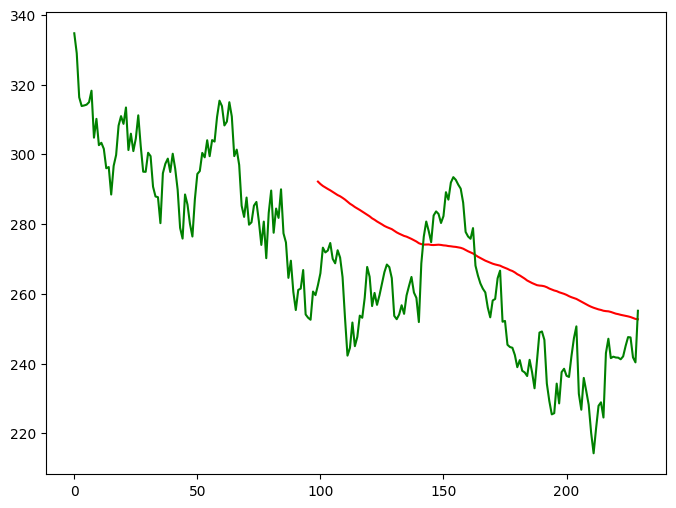

In [39]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [40]:
ma_200_days = data.Close.rolling(200).mean()

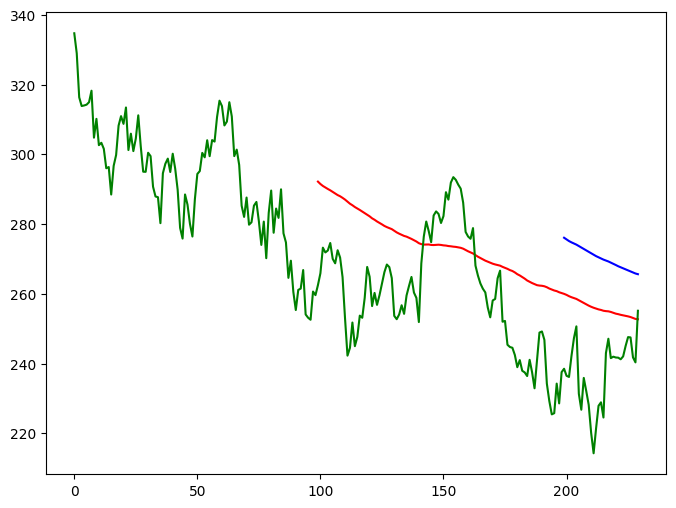

In [41]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [42]:
data.dropna(inplace=True)

In [43]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [44]:
data_train.shape[0]

184

In [45]:
data_test.shape[0]

46

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [47]:
data_train_scale = scaler.fit_transform(data_train)

In [48]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [49]:
x, y = np.array(x), np.array(y)

In [50]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [51]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [52]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
3/3 [==============================] - 7s 173ms/step - loss: 0.0939
Epoch 2/50
3/3 [==============================] - 1s 168ms/step - loss: 0.0722
Epoch 3/50
3/3 [==============================] - 1s 179ms/step - loss: 0.0395
Epoch 4/50
3/3 [==============================] - 0s 152ms/step - loss: 0.0360
Epoch 5/50
3/3 [==============================] - 0s 150ms/step - loss: 0.0311
Epoch 6/50
3/3 [==============================] - 1s 169ms/step - loss: 0.0277
Epoch 7/50
3/3 [==============================] - 0s 153ms/step - loss: 0.0296
Epoch 8/50
3/3 [==============================] - 0s 147ms/step - loss: 0.0271
Epoch 9/50
3/3 [==============================] - 0s 155ms/step - loss: 0.0232
Epoch 10/50
3/3 [==============================] - 0s 148ms/step - loss: 0.0228
Epoch 11/50
3/3 [==============================] - 0s 149ms/step - loss: 0.0251
Epoch 12/50
3/3 [==============================] - 0s 149ms/step - loss: 0.0252
Epoch 13/50
3/3 [==============================] 

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [55]:
pas_100_days = data_train.tail(100)

In [56]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [57]:
data_test_scale  =  scaler.fit_transform(data_test)

In [58]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [59]:
y_predict = model.predict(x)

2/2 [==============================] - 1s 48ms/step


In [60]:
scale =1/scaler.scale_

In [61]:
y_predict = y_predict*scale

In [62]:
y = y*scale

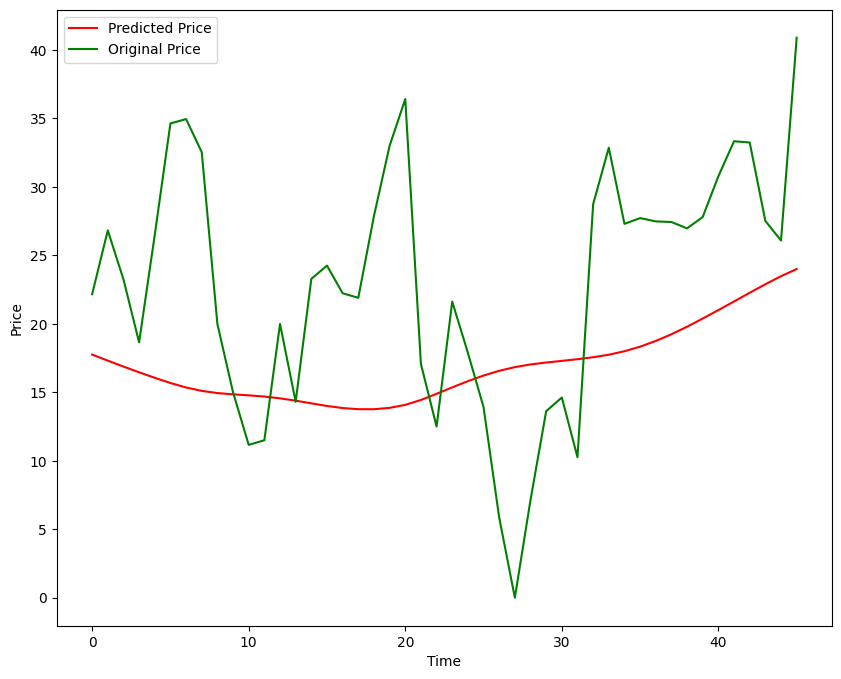

In [63]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
model.save('Stock Predictions Model.keras')